## Problem Statement

The Email Spam Collection is a set of emails. It contains one set of emails in English of 5,728 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: 'spam' contains the label (ham or spam) and 'text' contains the raw text.

## Library imports

In [47]:
# libraries to read the data and perform mathematical operations
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# importing libraries to visualize the text data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# setting the option to display long data in dataframe    
pd.set_option('display.max_colwidth', 150)

# library to split the dataset into training and test sets
from sklearn.model_selection import train_test_split



# importing the string class to remove punctuation
import string

#import the nltk corpus to remove stopwords
from nltk.corpus import stopwords

# libary to convert the string data to numeric array
from sklearn.feature_extraction.text import CountVectorizer

# library to perform the actual classification
from sklearn.naive_bayes import MultinomialNB

# importing libraries to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

## Reading the data

In [2]:
data = pd.read_csv("Emails.csv")

In [3]:
# checking the first five rows of the dataframe
data.head(5)

,text,spam
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the inf...,1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not...,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3...",1
3,Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf for...,1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is y...",1


In [4]:
data.tail(5)

,text,spam
5723,Subject: re : research and development charges to gpg here it is ! - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / h...,0
5724,"Subject: re : receipts from visit jim , thanks again for the invitation to visit lsu . shirley will fedex the receipts tomorrow . vince "" jam...",0
5725,Subject: re : enron case study update wow ! all on the same day . that ' s super . thank you so very much . vince is coming up to baylor on mond...,0
5726,"Subject: re : interest david , please , call shirley crenshaw ( my assistant ) , extension 5 - 5290 to set it up . vince david p dupre 06 / ...",0
5727,"Subject: news : aurora 5 . 2 update aurora version 5 . 2 - the fastest model just got faster - epis announces the release of aurora , version 5...",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
data.describe(include = object)

,text
count,5728
unique,5695
top,"Subject: retail markets conference i would like to invite you to participate in a conference on "" retail participation in competitive power mark..."
freq,2


## Visualising the dataset

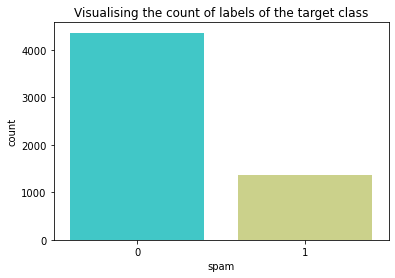

In [8]:
sns.countplot(x = data["spam"], palette= 'rainbow')
plt.title("Visualising the count of labels of the target class")
plt.show()

In [9]:
# 0 stands for ham and 1 for spam. So, there are more ham messages than spam in the given dataset

In [10]:
# splitting the dataframe into ham and spam, based on the target class

In [11]:
ham = data[data['spam'] == 0]
ham.shape

(4360, 2)

In [12]:
ham.head(3)

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" for your completed questionnaire and for a one - page bio / statement on your thoughts on "" business...",0
1369,Subject: sacramento weather station fyi - - - - - - - - - - - - - - - - - - - - - - forwarded by mike a roberts / hou / ect on 09 / 20 / 2000 0...,0
1370,"Subject: from the enron india newsdesk - jan 18 th newsclips vince , fyi . - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep koh...",0


In [13]:
spam = data[data['spam'] == 1]
spam.shape

(1368, 2)

In [14]:
spam.head(3)

,text,spam
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the inf...,1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not...,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3...",1


In [15]:
# Visualizing the count and percentage for the target class

# finding the percent of each label in the target class
ham_percent = pd.Series(data[data['spam'] == 0]['spam'].count()/len(data))
spam_percent = pd.Series(data[data['spam'] == 1]['spam'].count()/len(data))


# finding the count of each label in the target class
ham_count = pd.Series(data[data['spam'] == 0]['spam'].count())
spam_count = pd.Series(data[data['spam'] == 1]['spam'].count())

# concatenating the count and percentage of values into different dataframes respectively
df1 = pd.concat([ham_count, spam_count], axis = 1)
df2 = pd.concat([ham_percent, spam_percent], axis = 1)

# renaming the columns and index for the dataframe storing the percentage of values
df2.rename(columns = {0:'Ham', 1: 'Spam'}, inplace = True)
df2.rename(index = {0:'Percentage'}, inplace = True)


# renaming the columns and index for the dataframe storing the count of values
df1.rename(columns = {0:'Ham', 1:'Spam'}, inplace = True)
df1.rename(index = {0:'Count'}, inplace = True)

# concatenating both the dataframes to obtain one final dataframe
df_target_desc = pd.concat([df1, df2], axis = 0)

# displaying the final dataframe showing the distribution of the categories in the target class
df_target_desc

,Ham,Spam
Count,4360.000000,1368.000000
Percentage,0.761173,0.238827


In [16]:
data.groupby('spam').describe().T.rename(columns = {0: 'Ham', 1: 'Spam'})

spam                                                                                                                                                           Ham  \
text count                                                                                                                                                    4360   
     unique                                                                                                                                                   4327   
     top     Subject: re : enron weather research  good afternoon mike :  i certainly am interested in determining if there may be a potential fit  there at en...   
     freq                                                                                                                                                        2   

spam                                                                                                                                                          Spam  
text count                                                                                                                                                    1368  
     unique                                                                                                                                                   1368  
     top     Subject: well , trry it  hello , welcome to pharmon wallow line s dilative hop  - on extensible e of the leading oniine pharmaceutical shops  grea...  
     freq                                                                                                                                                        1

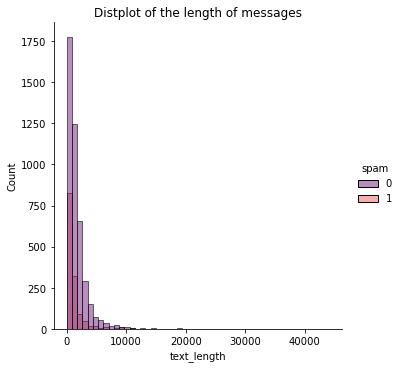

In [17]:
data['text_length'] = data['text'].apply(len)
sns.displot(x = 'text_length', bins = 50, hue = 'spam', data = data, palette= 'magma')
plt.title("Distplot of the length of messages")
plt.show()

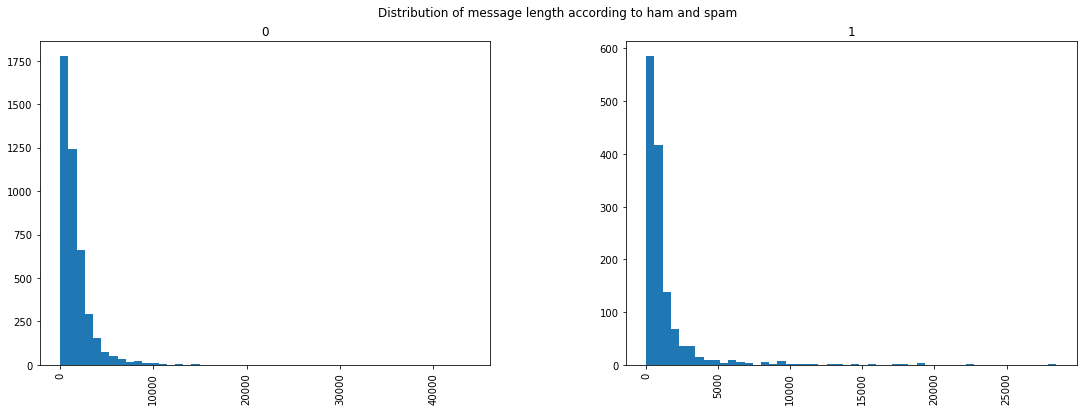

In [18]:
data.hist(column = 'text_length', by = 'spam', bins = 50, figsize = (18,6))
plt.suptitle("Distribution of message length according to ham and spam")
plt.show()

In [19]:
# splitting the text according to ham or spam to generate separate wordclouds for each
ham_text = data[data['spam'] == 0]['text']
spam_text = data[data['spam'] == 1]['text']

In [20]:
# using wordcloud to visualise the text data

# creating a single string of all the ham text to be fed into the wordcloud
ham_text = " ".join(mail for mail in ham_text.astype(str))

# storing the stopwords in a set to be passed to the WordCloud constructor
stopwords = set(STOPWORDS)
stopwords.update(['Subject', 'ect'])

# Creating the wordcloud
wordcloud_ham = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(ham_text)

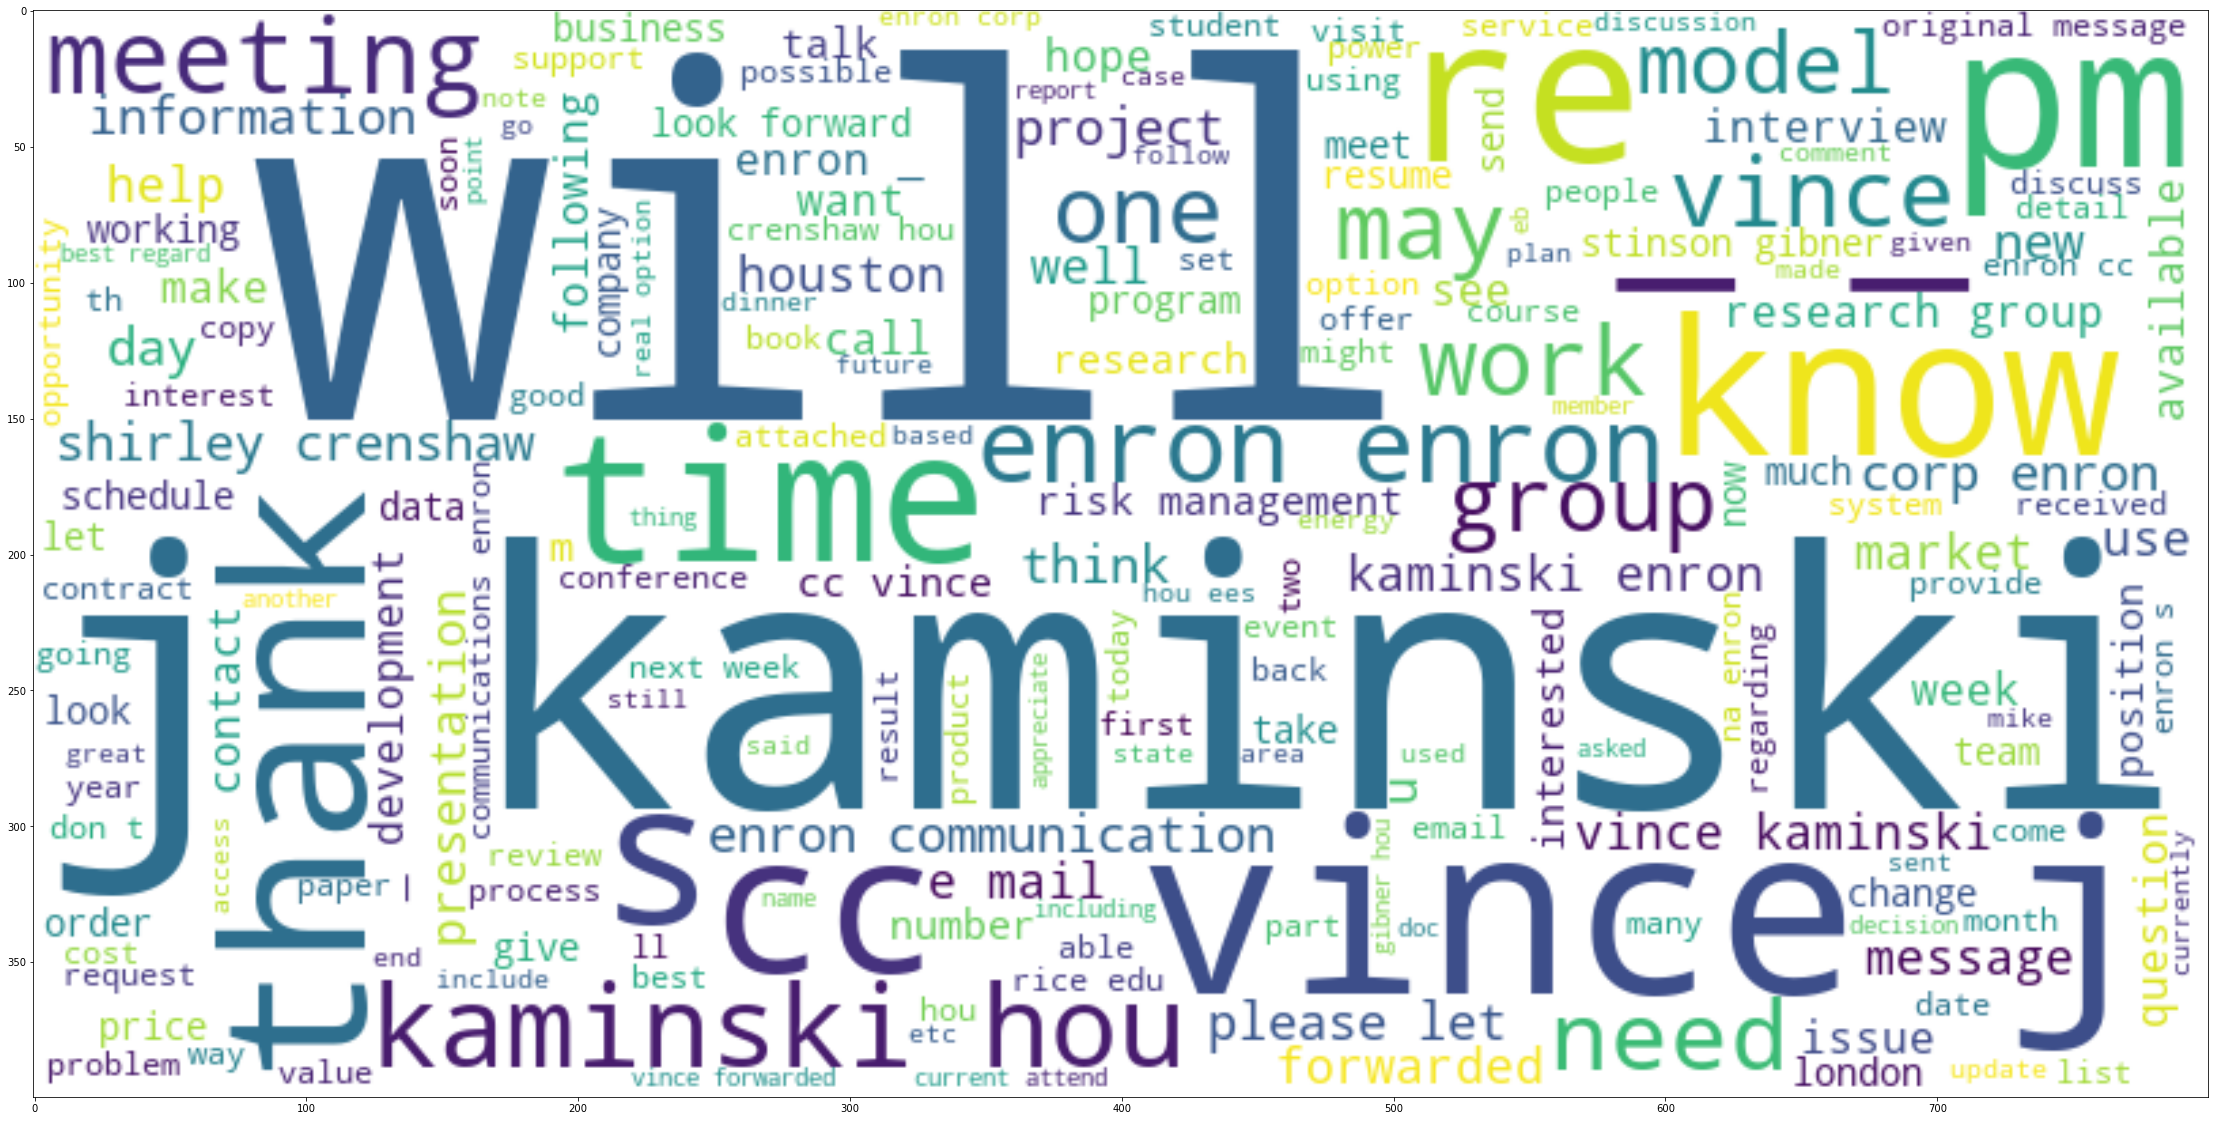

In [21]:
plt.figure( figsize=(40,20))

plt.imshow(wordcloud_ham, interpolation='bilinear')

plt.show()

In [22]:
# using wordcloud to visualise the text data

# creating a single string of all the spam text to be fed into the wordcloud
spam_text = " ".join(mail for mail in spam_text.astype(str))

# storing the stopwords in a set to be passed to the WordCloud constructor
stopwords = set(STOPWORDS)
stopwords.update(['Subject'])

# Creating the wordcloud
wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(spam_text)

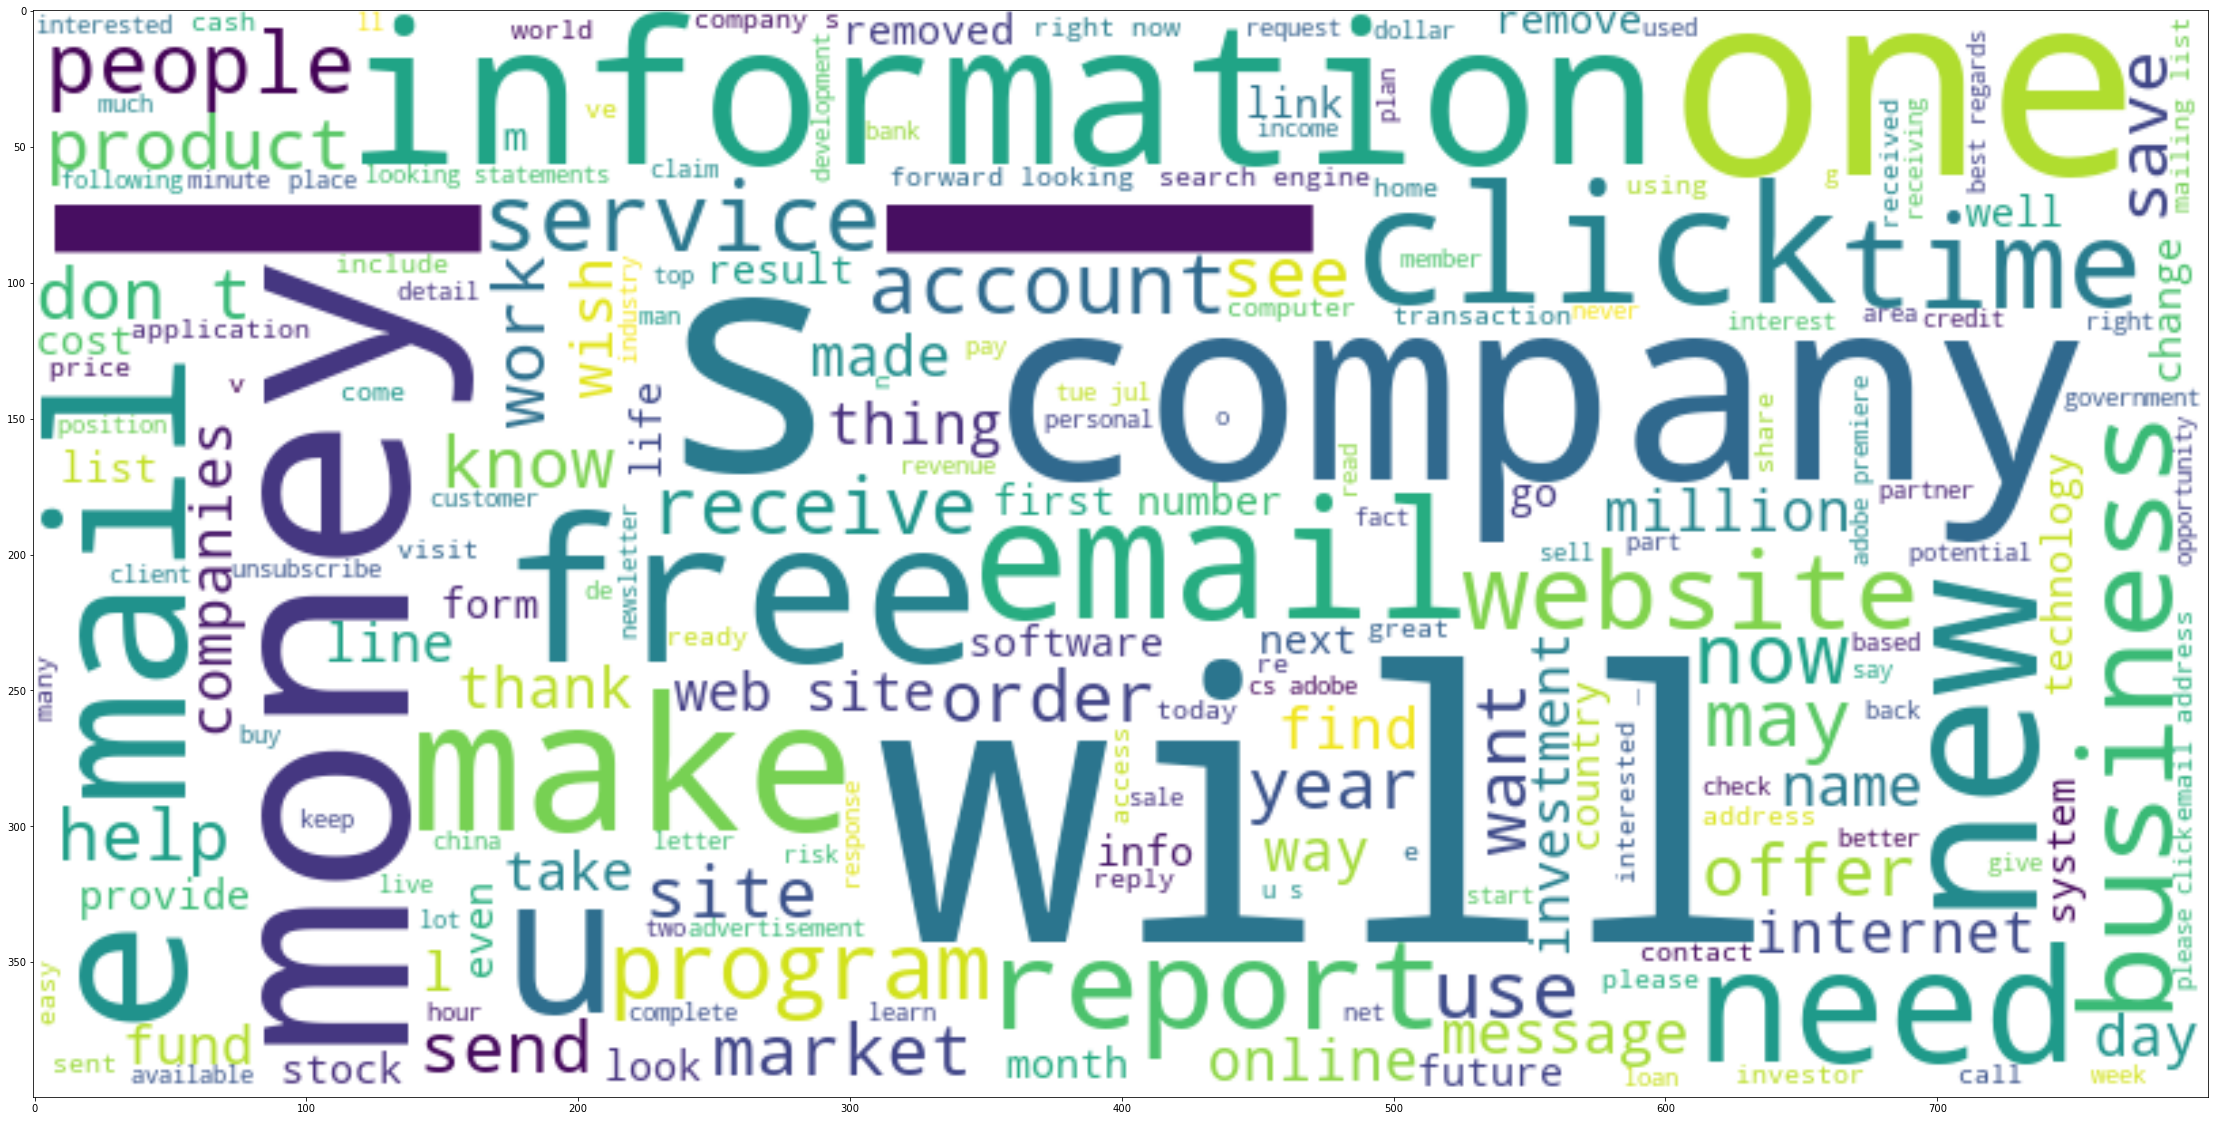

In [23]:
plt.figure( figsize=(40,20))

plt.imshow(wordcloud_spam, interpolation='bilinear')

plt.show()

## Data Preprocessing

In [26]:
# Defining a function to perform text cleaning so that it can be applied to every message in the dataset
# it returns a tokenised message, i.e. the string is converted to a list of words.

# Step1: Removing the punctuation
# Step2 : Removing the stopwords
def text_cleaner(message):
    punc_removed = ''.join([char for char in message if char not in string.punctuation])
    cleaned_text = [word for word in punc_removed.split() if word.lower() not in stopwords.words('english')]
    return(cleaned_text)

In [53]:
# instantiating a CountVectorizer with the analyzer as the text cleaning function defined above

vectorizer = CountVectorizer(analyzer = text_cleaner)
spam_ham_vectorizer = vectorizer.fit_transform(data['text'])

In [54]:
print(vectorizer.get_feature_names())

['\x01', '\x02', '\x03', '\x05', '\x06', '\x07', '\x08', '\x0f', '\x10', '\x12', '\x14', '\x15', '\x19', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '

In [55]:
print(spam_ham_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
print("The number of messages were : {}".format(spam_ham_vectorizer.shape[0]))
print("The number of words that have been translated are : {}".format(spam_ham_vectorizer.shape[1]))

The number of messages were : 5728
The number of words that have been translated are : 37229


## Training the model

In [57]:
# storing the values of the target class in a separate array
labels = data['spam'].values

In [58]:
X = spam_ham_vectorizer
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 101 )

In [59]:
# training the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [60]:
# testing the classifier on dummy data
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]

# Vectorizing the dummy data
testing_sample = vectorizer.transform(testing_sample)

# applying the classifier 
classifier.predict(testing_sample)

array([1, 0], dtype=int64)

## Evaluating the model

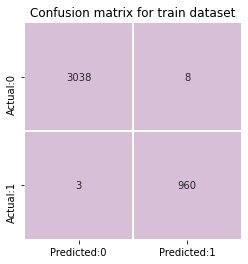

In [61]:
# Evaluating the model on training data
y_pred_train = classifier.predict(X_train)
cm = pd.DataFrame(data = confusion_matrix(y_train, y_pred_train), index = ['Actual:0', 'Actual:1'], 
             columns = ['Predicted:0', 'Predicted:1'])
sns.heatmap(cm, square=True, annot = True, cbar = False, fmt = 'd',
            cmap = ListedColormap('Thistle'), linewidths=0.2, linecolor='white')
plt.title("Confusion matrix for train dataset")
plt.show()

Text(0.5, 1.0, 'Confusion matrix for test dataset')

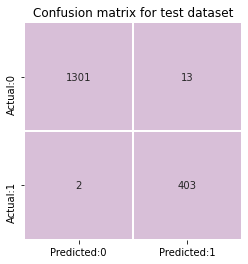

In [62]:
# Evaluating the model on testing data
y_pred_test = classifier.predict(X_test)
cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred_test), index = ['Actual:0', 'Actual:1'], 
             columns = ['Predicted:0', 'Predicted:1'])
sns.heatmap(cm, square=True, annot = True, cbar = False, fmt = 'd',
            cmap = ListedColormap('Thistle'), linewidths=0.2, linecolor='white')
plt.title("Confusion matrix for test dataset")

In [63]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1314
           1       0.97      1.00      0.98       405

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



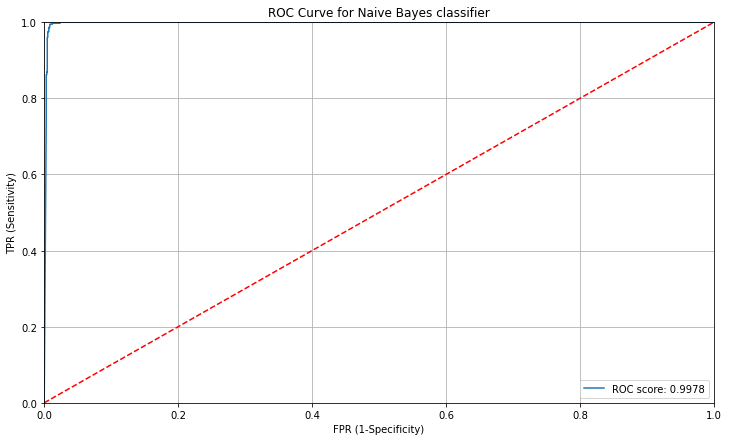

In [64]:
# Plotting the ROC curve:

plt.figure(figsize = (12, 7))
y_pred_proba = classifier.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'ROC score: {}'.format(round(roc_score,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.legend()
plt.grid()
plt.title("ROC Curve for Naive Bayes classifier")
plt.show()